# RECELL PROJECT

## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished smartphones. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone and identify factors that significantly influence it.

## Data

* brand_name: Name of manufacturing brand
* os: OS on which the phone runs
* screen_size: Size of the screen in cm
* 4g: Whether 4G is available or not
* 5g: Whether 5G is available or not
* main_camera_mp: Resolution of the rear camera in megapixels
* selfie_camera_mp: Resolution of the front camera in megapixels
* int_memory: Amount of internal memory (ROM) in GB
* ram: Amount of RAM in GB
* battery: Energy capacity of the phone battery in mAh
* weight: Weight of the phone in grams
* release_year: Year when the phone model was released
* days_used: Number of days the used/refurbished phone has been used
* new_price: Price of a new phone of the same model in euros
* used_price: Price of the used/refurbished phone in euros

In [1]:
#Library to supress warnings.
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

In [2]:
# loading the dataset
df = pd.read_csv("used_phone_data.csv")

In [3]:
#check the outline of the data first five
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80


In [4]:
#check the outline of the data last five
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
3566,Asus,Android,15.88,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,654.5000,490.96
3567,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,518.8145,259.30
3568,Alcatel,Android,18.73,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,92.6500,69.81
3569,Alcatel,Android,18.73,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,101.9150,76.07
3570,Alcatel,Android,13.49,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,72.2415,50.48


In [5]:
#check the number of rows and columns
df.shape

(3571, 15)

* The dataset contains 3571 rows and 15 columns

In [6]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


## observation

* Brand_name, os, 4g and 5g will be converted to categorical to reduce space
* The rest are floats and integers. 


In [7]:
# let's create a copy of the data to avoid any changes to original data
df = df.copy()

In [8]:
# Convert data type object to category
df["brand_name"]=df["brand_name"].astype("category")
df["os"]=df["os"].astype("category")
df["4g"]=df["4g"].astype("category")
df["5g"]=df["5g"].astype("category")

In [9]:
# reprint information to confirm change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3571 non-null   category
 1   os                3571 non-null   category
 2   screen_size       3571 non-null   float64 
 3   4g                3571 non-null   category
 4   5g                3571 non-null   category
 5   main_camera_mp    3391 non-null   float64 
 6   selfie_camera_mp  3569 non-null   float64 
 7   int_memory        3561 non-null   float64 
 8   ram               3561 non-null   float64 
 9   battery           3565 non-null   float64 
 10  weight            3564 non-null   float64 
 11  release_year      3571 non-null   int64   
 12  days_used         3571 non-null   int64   
 13  new_price         3571 non-null   float64 
 14  used_price        3571 non-null   float64 
dtypes: category(4), float64(9), int64(2)
memory usage: 322.7 KB


* Brand_name, os , 4g and 5g converted to categorical.
* Memory also reduced to 322.7KB

In [10]:
# Statistical summary of the data
df.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
count,3571.000000,3391.000000,3569.000000,3561.000000,3561.000000,3565.000000,3564.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,14.803892,9.400454,6.547352,54.532607,4.056962,3067.225666,179.424285,2015.964996,675.391487,237.389037,109.880277
std,5.153092,4.818396,6.879359,84.696246,1.391844,1364.206665,90.280856,2.291784,248.640972,197.545581,121.501226
min,2.700000,0.080000,0.300000,0.005000,0.030000,80.000000,23.000000,2013.000000,91.000000,9.130000,2.510000
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,140.000000,2014.000000,536.000000,120.130000,45.205000
50%,13.490000,8.000000,5.000000,32.000000,4.000000,3000.000000,159.000000,2016.000000,690.000000,189.800000,75.530000
75%,16.510000,13.000000,8.000000,64.000000,4.000000,4000.000000,184.000000,2018.000000,872.000000,291.935000,126.000000
max,46.360000,48.000000,32.000000,1024.000000,16.000000,12000.000000,950.000000,2020.000000,1094.000000,2560.200000,1916.540000


## Data processing

### Missing Value Treatment

In [11]:
# checking for missing values
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

* Replace all missing values in the columns with median.
* Median is the true representation of the distribution of the data.

In [12]:
# Filling out missing values with their median
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller, axis=0)

In [13]:
# confirming missing value treatment.
df.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

In [14]:
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
3566,Asus,Android,15.88,yes,no,8.0,8.0,64.0,6.0,5000.0,190.0,2019,232,654.5000,490.96
3567,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,518.8145,259.30
3568,Alcatel,Android,18.73,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,92.6500,69.81
3569,Alcatel,Android,18.73,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,101.9150,76.07
3570,Alcatel,Android,13.49,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,72.2415,50.48


* All missing values have been treated. 

In [15]:
# Let's look at the statistical summary of the data
pd.set_option(
    "display.float_format", lambda x: "%.3f" % x
)  # to display numbers rounded off to 3 decimal places

df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3571,34,Others,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3571,4,Android,3246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3571.000,NaN,NaN,NaN,14.804,5.153,2.700,12.700,13.490,16.510,46.360
4g,3571,2,yes,2359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3571,2,no,3419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3571.000,NaN,NaN,NaN,9.330,4.705,0.080,5.000,8.000,13.000,48.000
selfie_camera_mp,3571.000,NaN,NaN,NaN,6.546,6.878,0.300,2.000,5.000,8.000,32.000
int_memory,3571.000,NaN,NaN,NaN,54.470,84.586,0.005,16.000,32.000,64.000,1024.000
ram,3571.000,NaN,NaN,NaN,4.057,1.390,0.030,4.000,4.000,4.000,16.000
battery,3571.000,NaN,NaN,NaN,3067.113,1363.063,80.000,2100.000,3000.000,4000.000,12000.000


* Used_price is averaged at 109.88
* new_price is averaged at 237.389
* realease_year is from 2013 to 2020.

## EDA

### Univariate analysis

In [16]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="sea_blue"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**Observation on new_price**

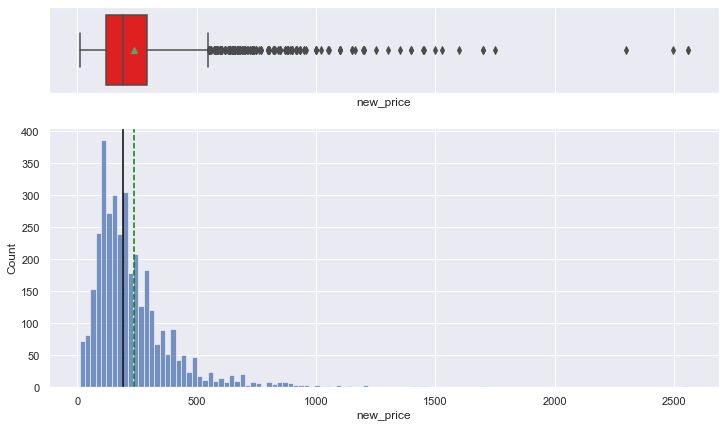

In [17]:
histogram_boxplot(df, "new_price")

* Variable is skewed to the right
* Outliers present to the right side
* Average price is around 250 Euros

**Observation on used_price**

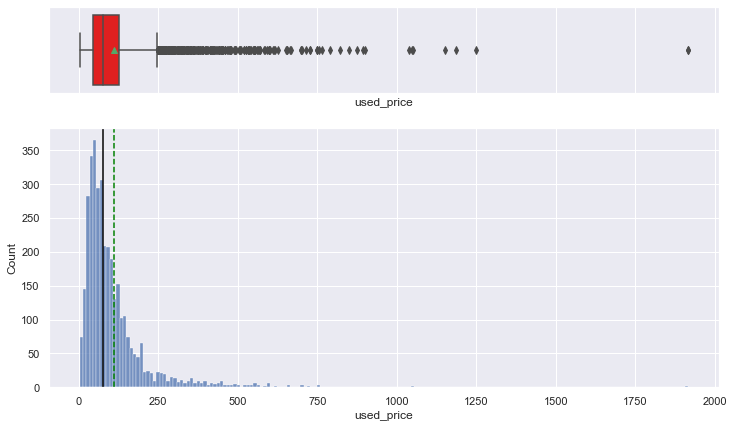

In [18]:
histogram_boxplot(df, "used_price")

* variable contains lots of outliers to the right.
* Average price must be around 100 Euros
* The distribution is rightly skewed.

**Observation on screen_size**

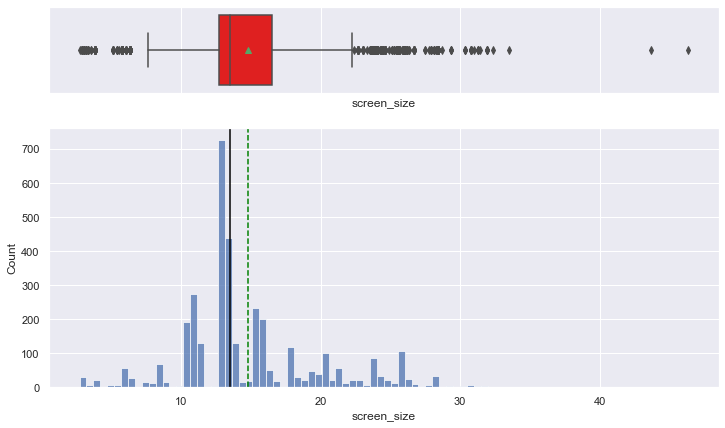

In [19]:
histogram_boxplot(df, "screen_size")

* Distribution looks normal.
* outliers at both ends.

**Observation on weight**

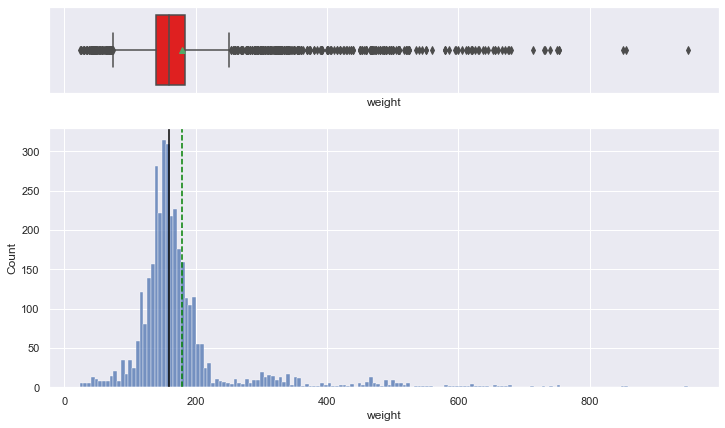

In [20]:
histogram_boxplot(df, "weight")

* Distribution looks normal.
* outliers at both ends.

**Observation on days_used**

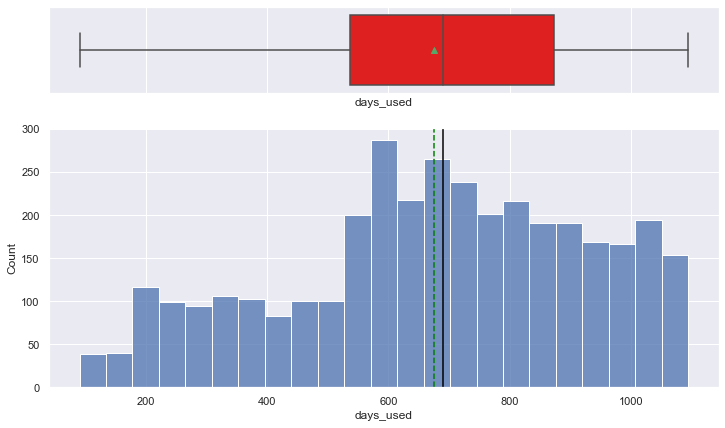

In [21]:
histogram_boxplot(df, "days_used")

* No outliers at both ends.
* Mean and median are close.
* Shows a normal distribution shape

### Barplot on all categorical variables

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**Observation on brand_name**

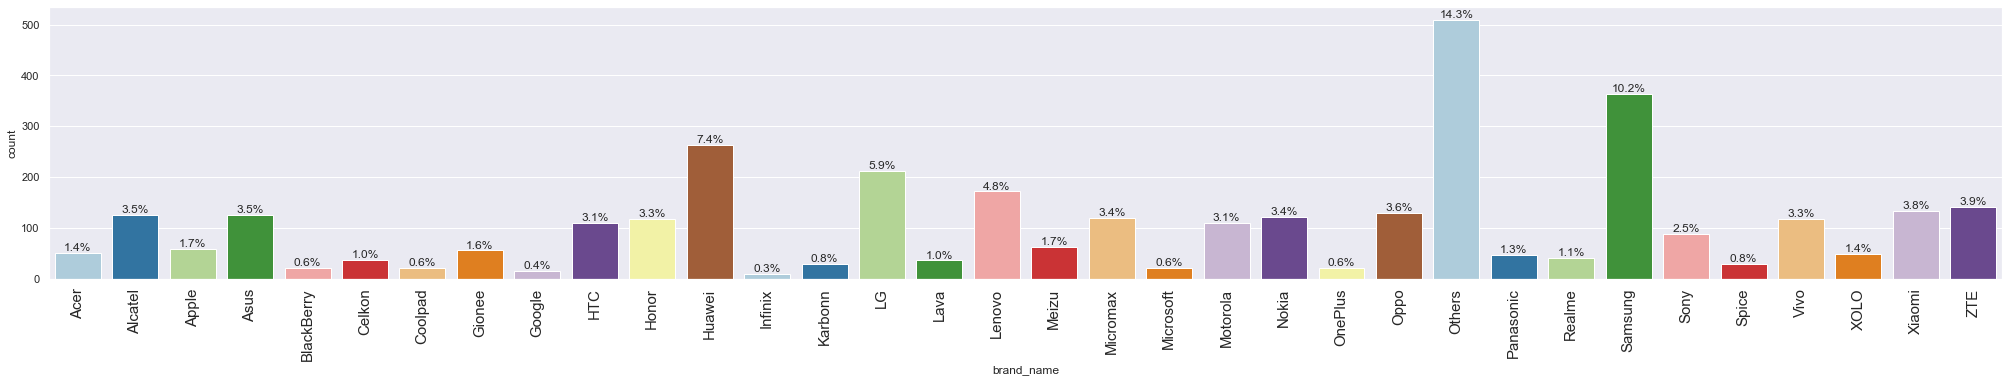

In [23]:
labeled_barplot(df, "brand_name", perc=True)

* Samsung is the most used brand followed by Huawei

**Observation on os**

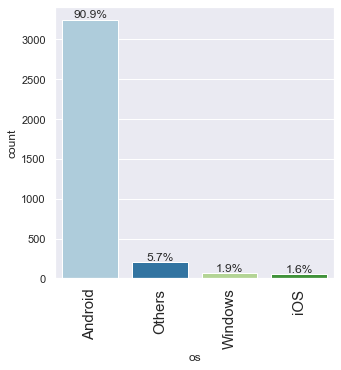

In [24]:
labeled_barplot(df, "os", perc=True)

* Android is the most used os and ios is the least in the data.

**Observation on 4g**

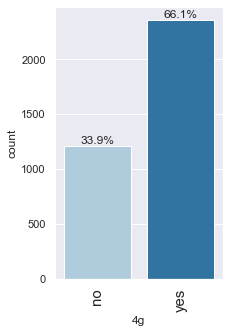

In [25]:
labeled_barplot(df, "4g", perc=True)

* 66.1% of the phones have 4g network.

**Observation on 5g**

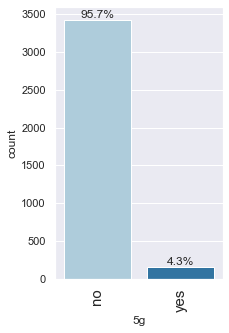

In [26]:
labeled_barplot(df, "5g", perc=True)

* 5g is not available for most brands. 

**Observation on main_camera_mp**

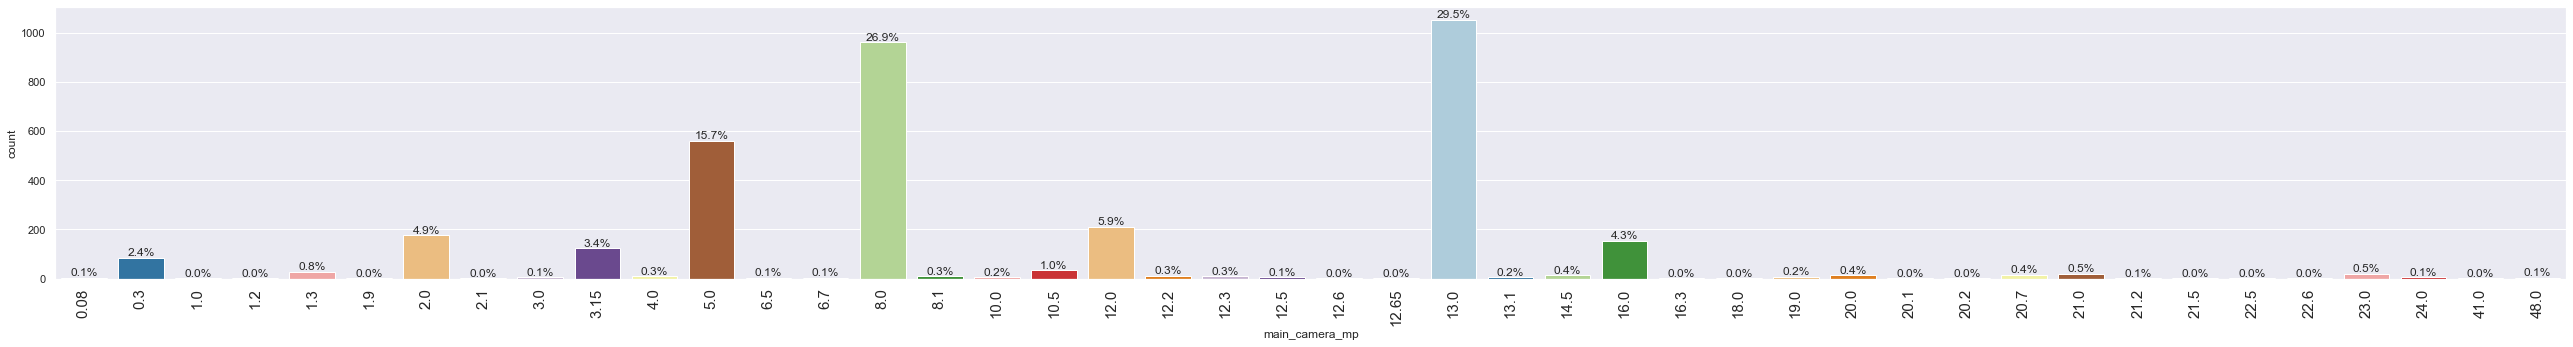

In [27]:
labeled_barplot(df, "main_camera_mp", perc=True)

* The most used is 13.0 mp followed by 8.0mp then 5.0mp. 

**Observation on selfie_camera_mp**

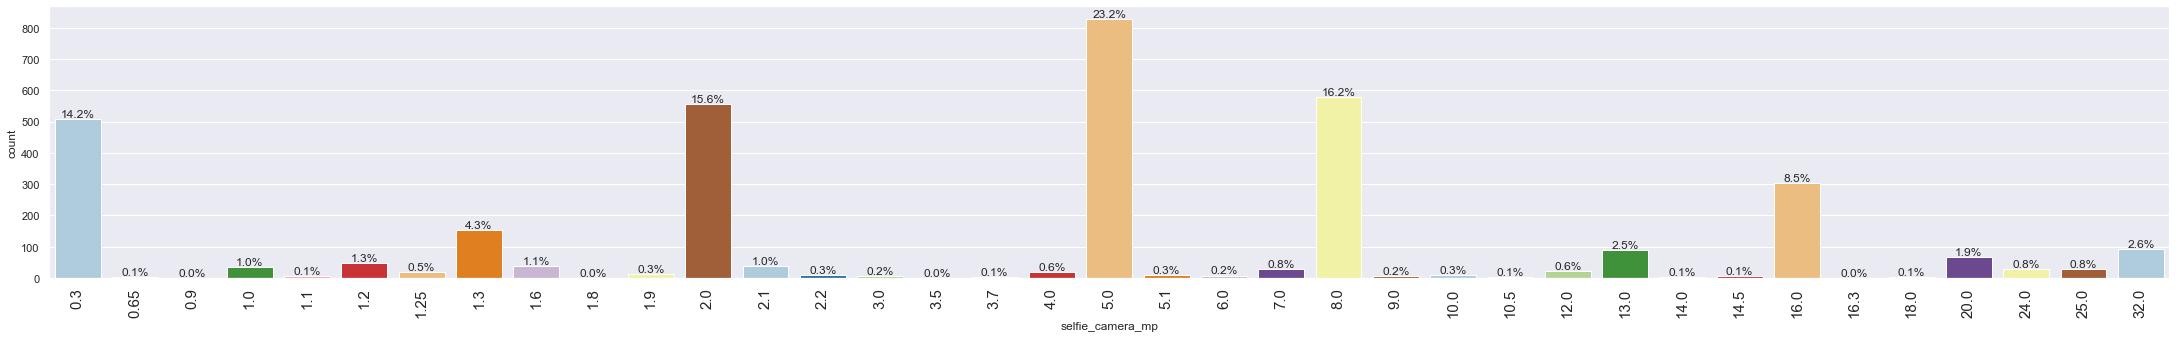

In [28]:
labeled_barplot(df, "selfie_camera_mp", perc=True)

* 5.0mp makes up 23.1% of the data followed 2.0mp(15.6%)

**Observation on int_memory**

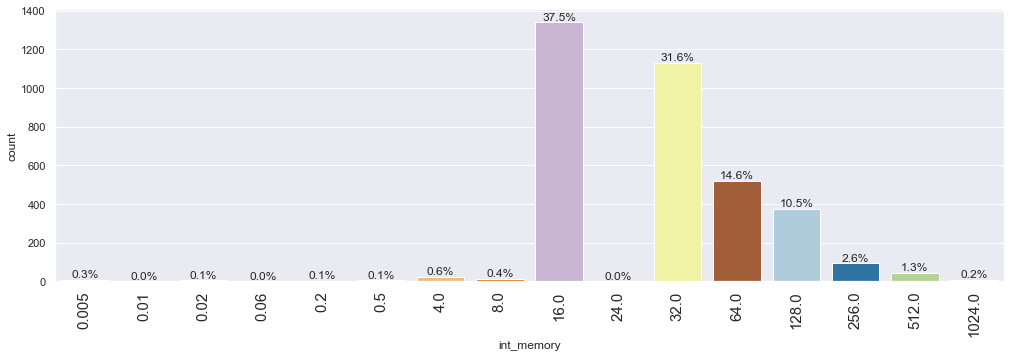

In [29]:
labeled_barplot(df, "int_memory", perc=True)

* 16.0 int_memory has the highest percentage of 37.5

**Observation on ram**

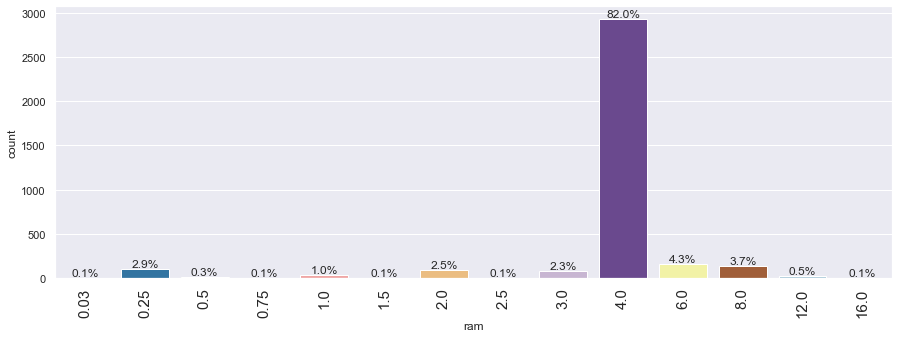

In [30]:
labeled_barplot(df, "ram", perc=True)

* Most phones have a ram of 4.0. This is 4/5th of the data.

**Observation on battery**

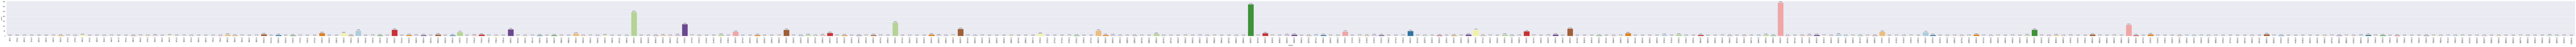

In [31]:
labeled_barplot(df, "battery", perc=True)

* 4000 has a percentage of 9.5%

**Observation on release_year**

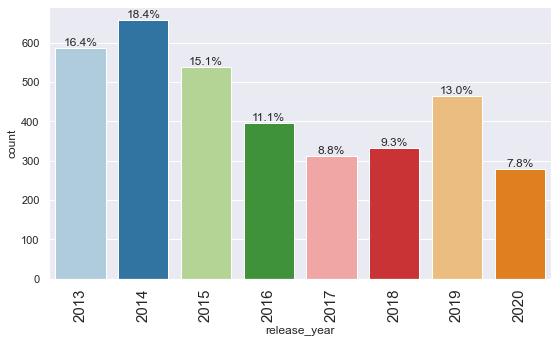

In [32]:
labeled_barplot(df, "release_year", perc=True)

* 2014 has the highest percentage followed by 2013.

## Bivariate analysis

### Heatmap

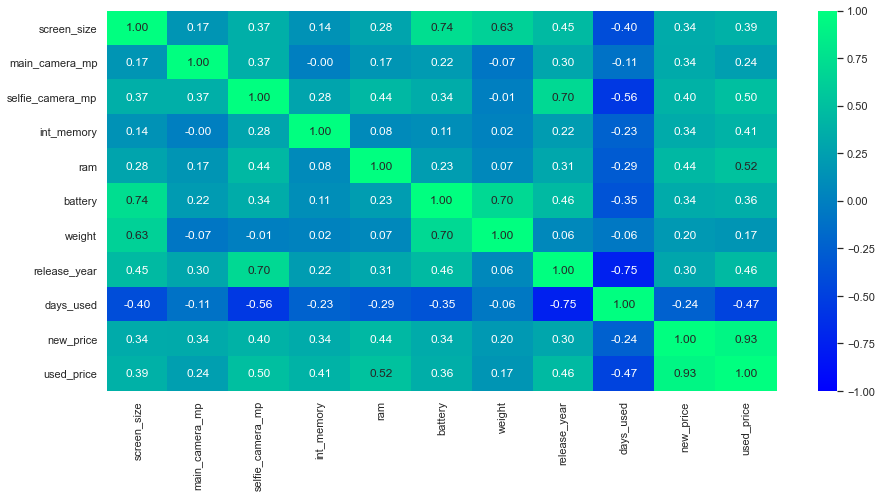

In [33]:
# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="winter",
)
plt.show()

* There is a very strong correlation between new_price and used_price.
* positive correlation between used_price and ram
* Positive correlation be weight, battery and screen_size is expected. 

### Let's look at the graphs of a few variables that are highly correlated with used_price.

#### used_price vs new_price vs os

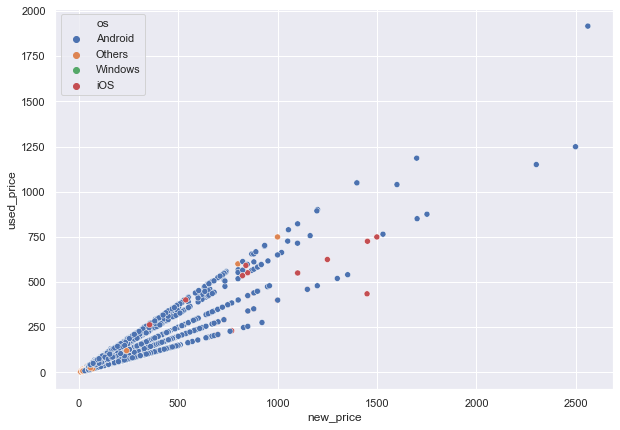

In [34]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="used_price", x="new_price", hue="os", data=df)
plt.show()

* android is the most prefered os.
* Used_price and new_price are positively correlated.

#### used_price vs new_price vs brand_name

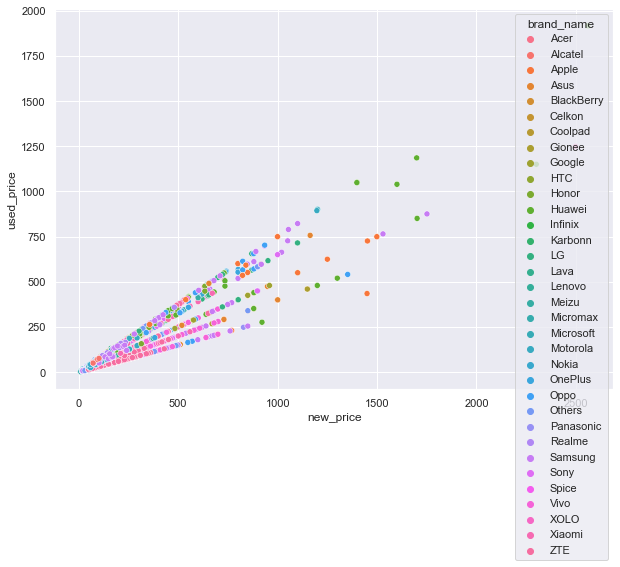

In [35]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="used_price", x="new_price", hue="brand_name", data=df)
plt.show()

* Used_price and new_price are positively correlated.

#### used_price vs new_price vs 5g

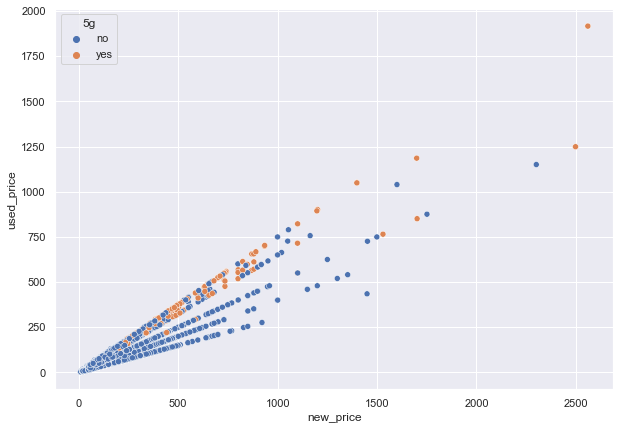

In [36]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="used_price", x="new_price", hue="5g", data=df)
plt.show()

* 5g available in the expensive phones.

#### release_year vs used_price

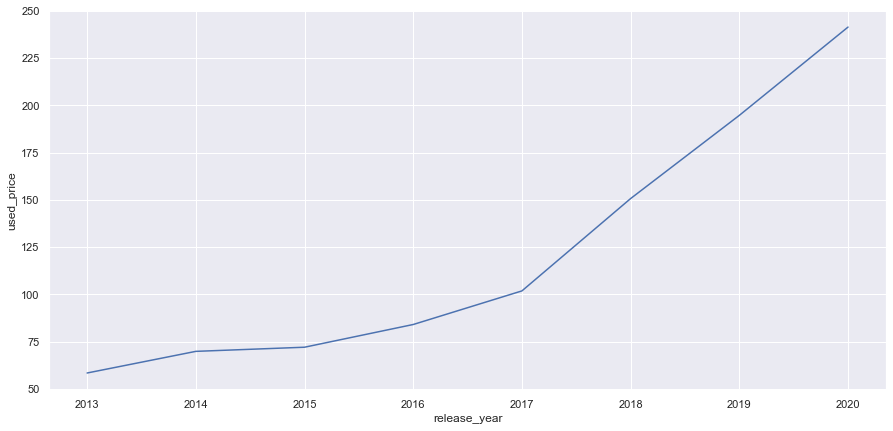

In [37]:
# average used_price over the years
plt.figure(figsize=(15, 7))
sns.lineplot(x="release_year", y="used_price", data=df, ci=None)
plt.show()

* prices of phones will always go up and rises steeply from 2017.

#### release_year vs new_price 

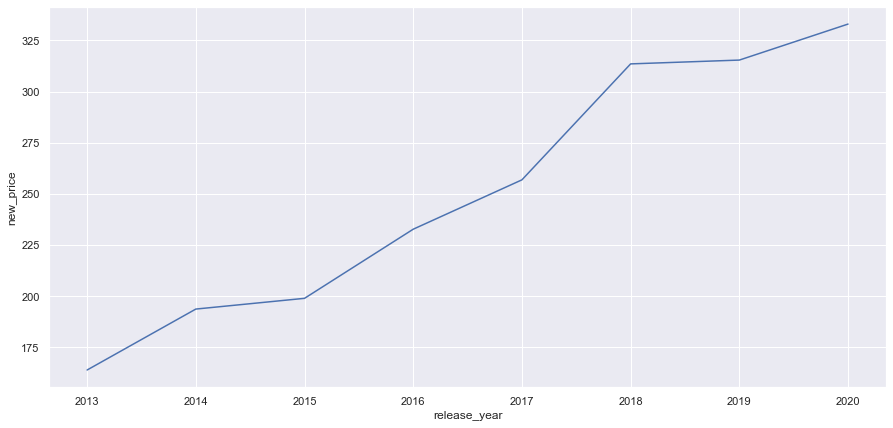

In [38]:
# average new_price over the years
plt.figure(figsize=(15, 7))
sns.lineplot(x="release_year", y="new_price", data=df, ci=None)
plt.show()

* prices of phones will always go up.

#### release_year vs used_price vs os

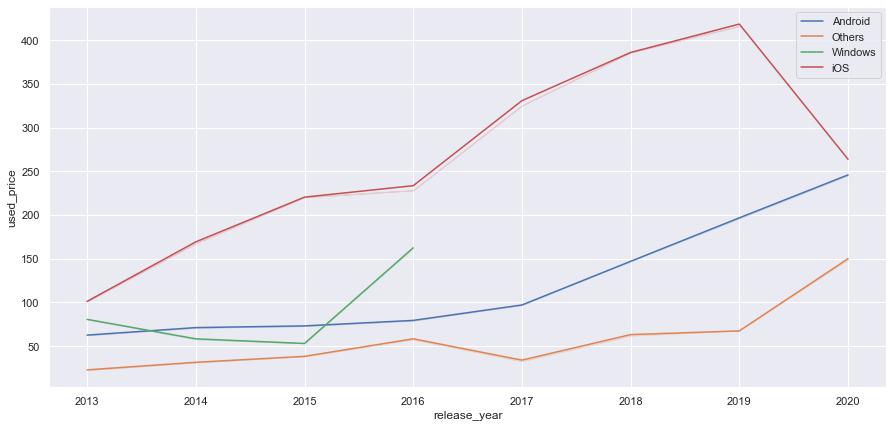

In [39]:
plt.figure(figsize=(15,7))
sns.lineplot(df["release_year"],df["used_price"],hue=df["os"],ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* The price of ios is highest compared to android, windows and others.
* There was a sharp decline in 2019 for ios.
* There was no data for wiondows from 2016.

#### release_year vs new_price vs os

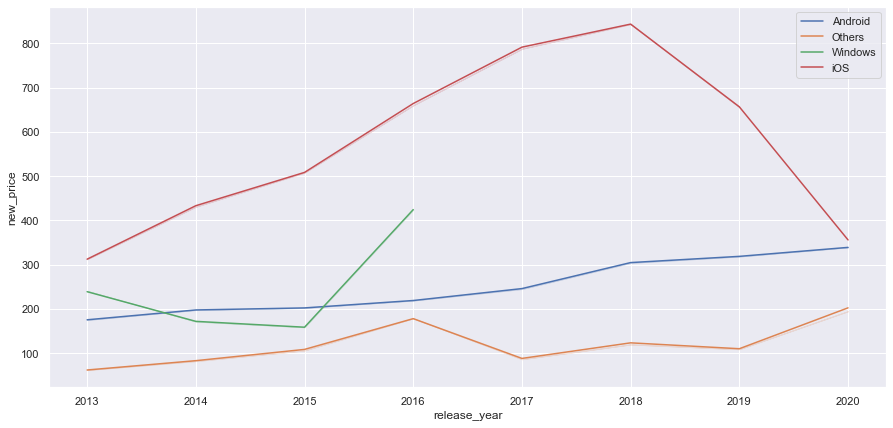

In [40]:
plt.figure(figsize=(15,7))
sns.lineplot(df["release_year"],df["new_price"],hue=df["os"],ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* The price of ios is highest compared to android, windows and others.
* There was a sharp decline in 2018 for ios.
* There was no data for wiondows from 2016.

## Data processing

#### Feature engineering

#### Log transformation

Some features are very skewed and will likely behave better on the log scale.

I will transform used_price, new_price and weight.

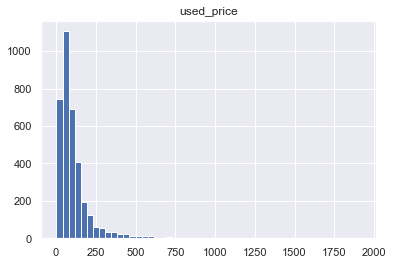

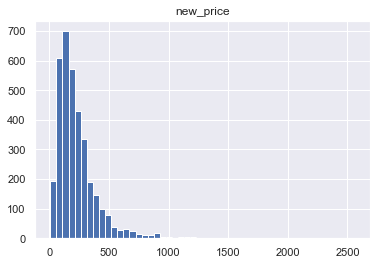

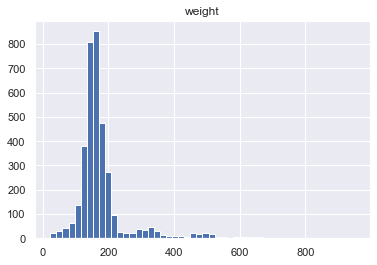

In [41]:
cols_to_log = ['used_price', 'new_price','weight']

for colname in cols_to_log:
    plt.hist(df[colname], bins=50)
    plt.title(colname)
    plt.show()

In [42]:
for colname in cols_to_log:
    df[colname + '_log'] = np.log(df[colname] + 1)
df.drop(cols_to_log, axis=1, inplace=True)

### Outliers detection

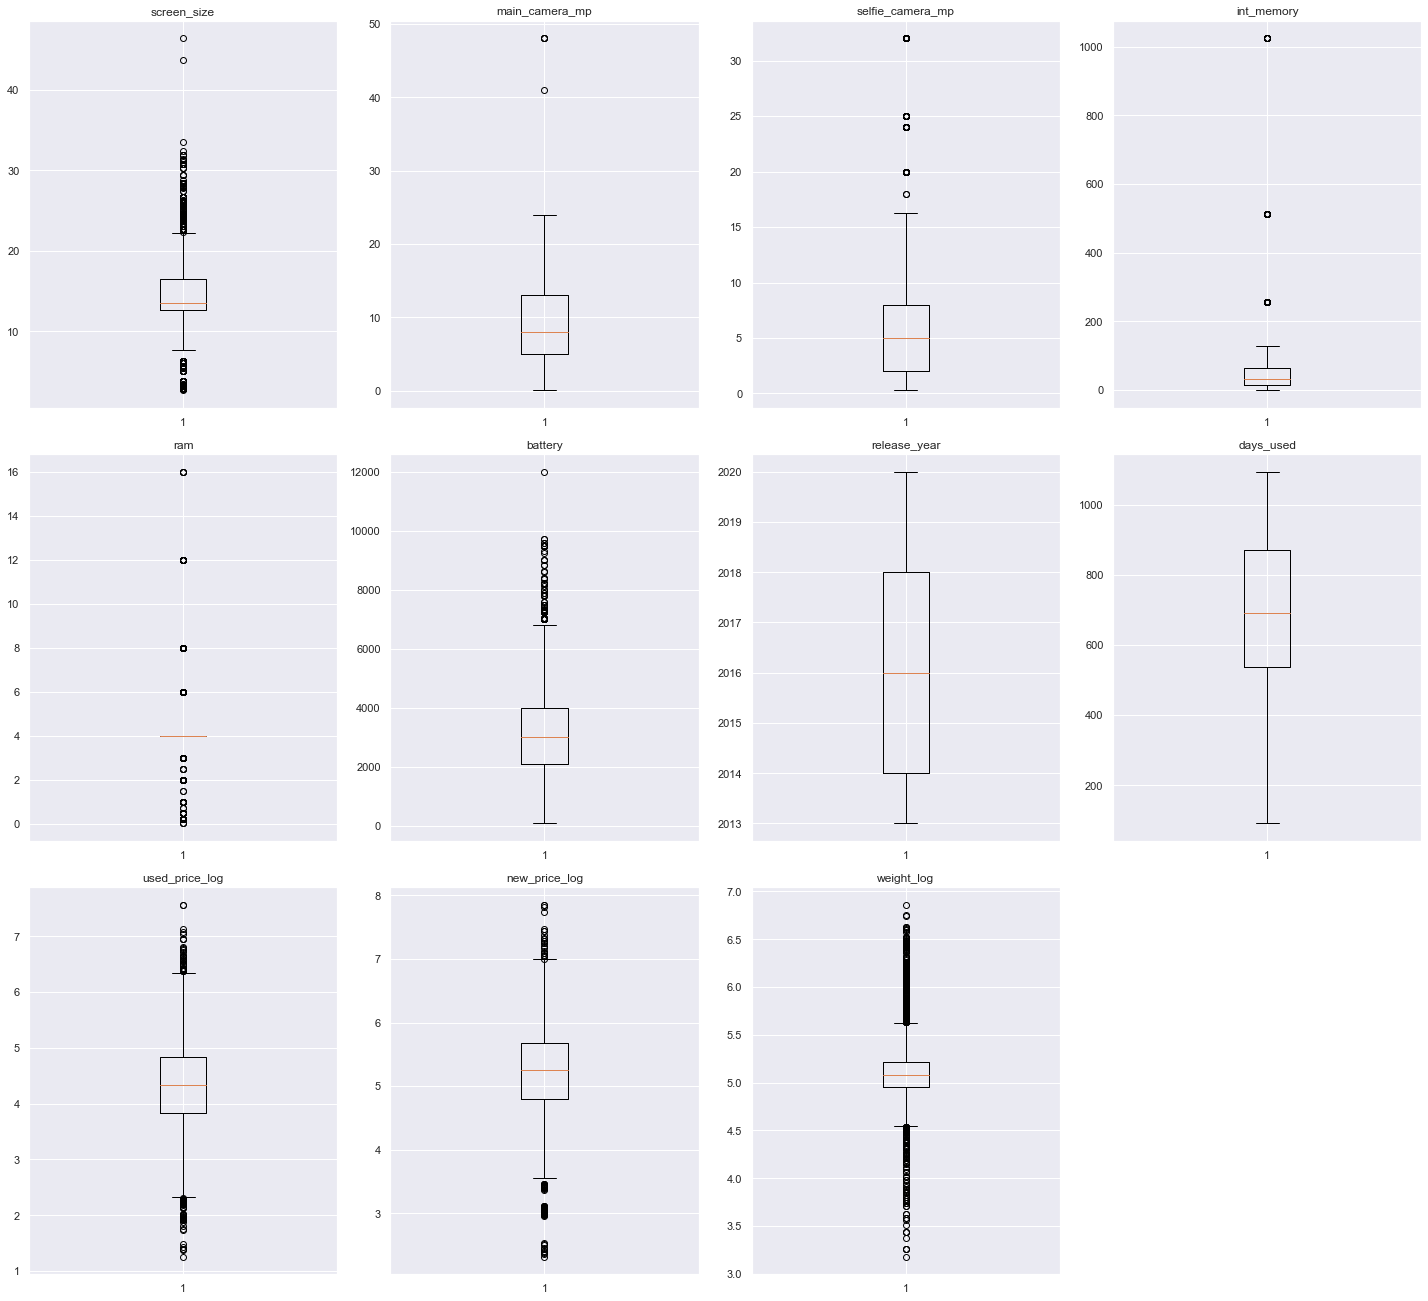

In [43]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(df.select_dtypes(include=np.number).columns.tolist()):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are no outliers for release_year and dyas_used.
* Screen_size, ram and weight have outliers at both ends.
* Main_camera_mp,selfie_camera_mp,battery,used_price and new_price have upper outliers.
* We will treat these outliers as these might adversely affect the predictive power of linear model. However, in real life, these outliers may be due to non-linear pattern in the data or can be important information.
* Sometimes outliers in the independent variable can adversely impact the linear model. This can be checked by building the model with and without outliers and comparing the model performances.

In [44]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [45]:
# treating the outliers
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)

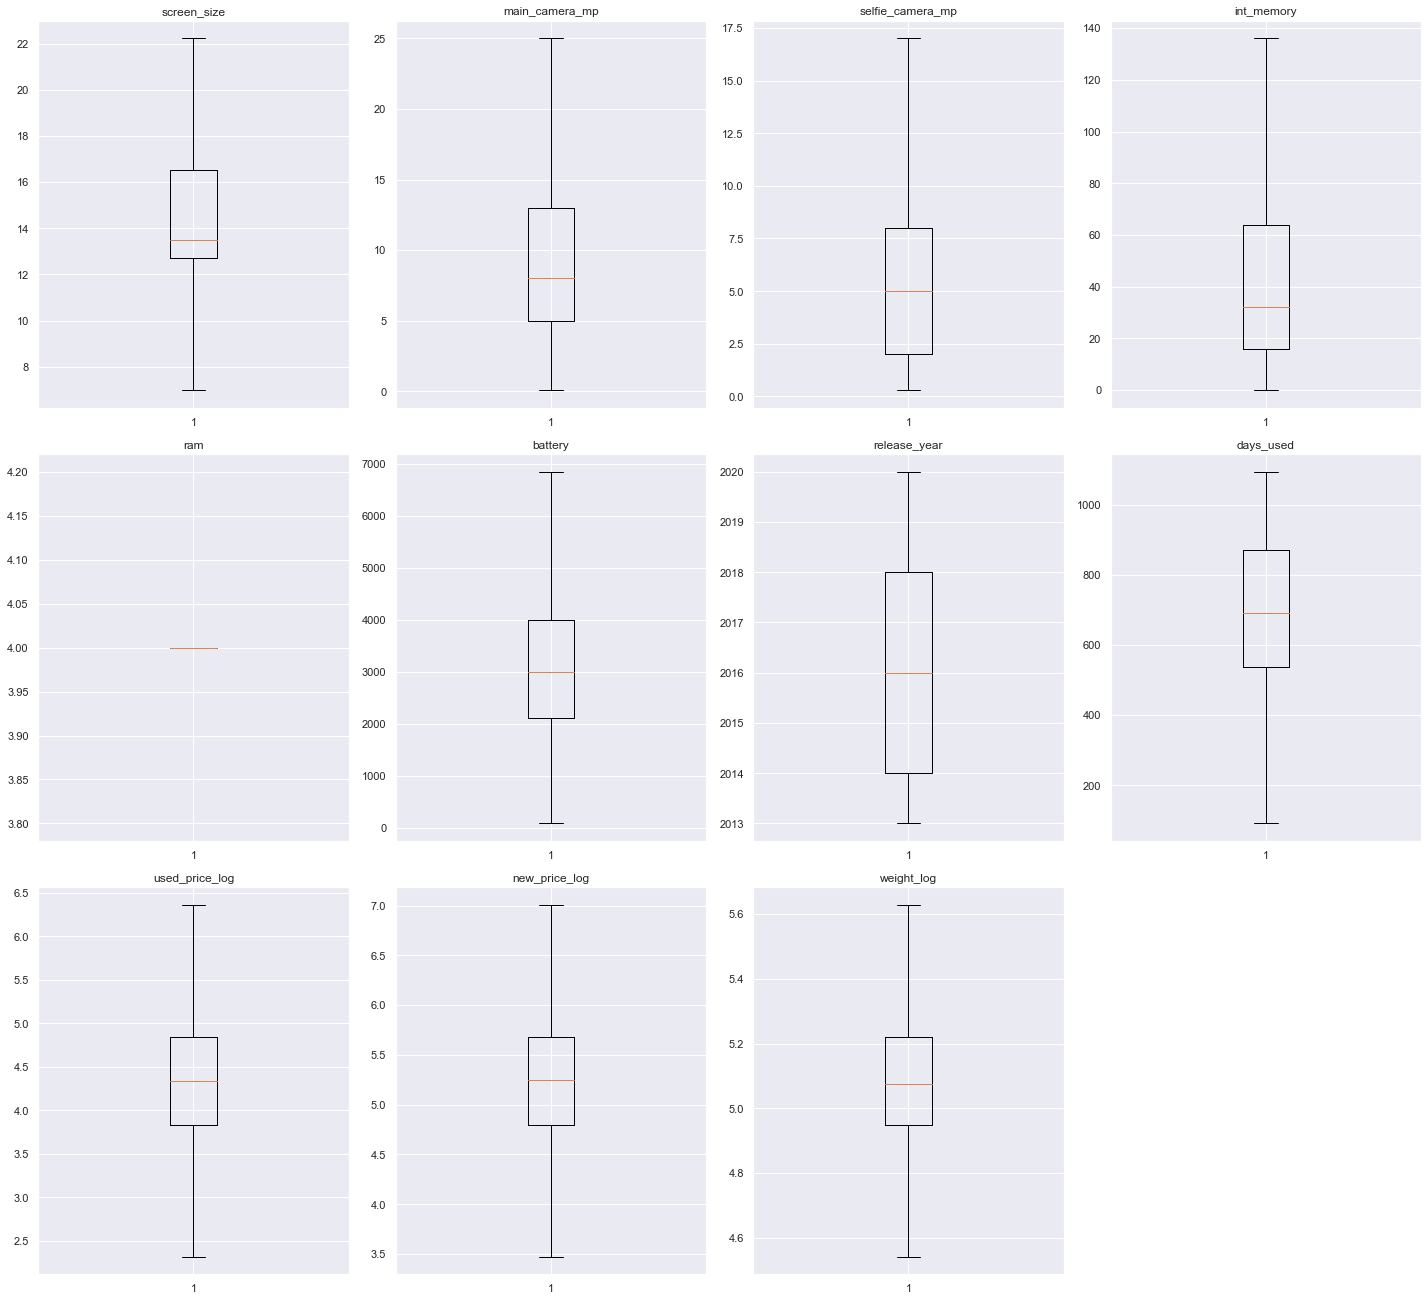

In [46]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(df.select_dtypes(include=np.number).columns.tolist()):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Linear Model Building

1. We want to predict the used_price.

2. Before we proceed to build a model, we'll have to encode categorical features.

3. We'll split the data into train and test to be able to evaluate the model that we build on the train data.

4. We will build a Linear Regression model using the train data and then check it's performance.

In [47]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,release_year,days_used,used_price_log,new_price_log,weight_log
0,Honor,Android,22.225,yes,no,13.000,5.000,64.000,4.000,3020.000,2020,127,4.477,4.724,4.990
1,Honor,Android,22.225,yes,yes,13.000,16.000,128.000,4.000,4300.000,2020,325,5.091,5.523,5.366
2,Honor,Android,22.225,yes,yes,13.000,8.000,128.000,4.000,4200.000,2020,162,5.597,5.887,5.366
3,Honor,Android,22.225,yes,yes,13.000,8.000,64.000,4.000,6850.000,2020,345,5.200,5.635,5.628
4,Honor,Android,15.720,yes,no,13.000,8.000,64.000,4.000,5000.000,2020,293,4.652,4.955,5.226


In [48]:
# defining X and y variables
X = df.drop(["new_price_log","used_price_log"], axis=1)
y = df["used_price_log"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android       22.225  yes   no          13.000   
1      Honor  Android       22.225  yes  yes          13.000   
2      Honor  Android       22.225  yes  yes          13.000   
3      Honor  Android       22.225  yes  yes          13.000   
4      Honor  Android       15.720  yes   no          13.000   

   selfie_camera_mp  int_memory   ram  battery  release_year  days_used  \
0             5.000      64.000 4.000 3020.000          2020        127   
1            16.000     128.000 4.000 4300.000          2020        325   
2             8.000     128.000 4.000 4200.000          2020        162   
3             8.000      64.000 4.000 6850.000          2020        345   
4             8.000      64.000 4.000 5000.000          2020        293   

   weight_log  
0       4.990  
1       5.366  
2       5.366  
3       5.628  
4       5.226  
0   4.477
1   5.091
2   5.597
3   5.200
4   4.652
Name: used_price_l

In [49]:
# Let's look at the statistical summary of the data
pd.set_option(
    "display.float_format", lambda x: "%.3f" % x
)  # to display numbers rounded off to 3 decimal places

df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3571,34,Others,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3571,4,Android,3246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3571.000,NaN,NaN,NaN,14.522,4.166,6.985,12.700,13.490,16.510,22.225
4g,3571,2,yes,2359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3571,2,no,3419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3571.000,NaN,NaN,NaN,9.300,4.531,0.080,5.000,8.000,13.000,25.000
selfie_camera_mp,3571.000,NaN,NaN,NaN,5.972,5.287,0.300,2.000,5.000,8.000,17.000
int_memory,3571.000,NaN,NaN,NaN,44.583,38.939,0.005,16.000,32.000,64.000,136.000
ram,3571.000,NaN,NaN,NaN,4.000,0.000,4.000,4.000,4.000,4.000,4.000
battery,3571.000,NaN,NaN,NaN,3042.193,1272.573,80.000,2100.000,3000.000,4000.000,6850.000


### Encoding categorical columns

* There is categorical variables and our machine learning algorithm can only read numerical values.
* It is essential to encoding categorical features into numerical values

In [50]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,release_year,days_used,weight_log,brand_name_Alcatel,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,22.225,13.000,5.000,64.000,4.000,3020.000,2020,127,4.990,0,...,0,0,0,0,0,0,0,0,1,0
1,22.225,13.000,16.000,128.000,4.000,4300.000,2020,325,5.366,0,...,0,0,0,0,0,0,0,0,1,1
2,22.225,13.000,8.000,128.000,4.000,4200.000,2020,162,5.366,0,...,0,0,0,0,0,0,0,0,1,1
3,22.225,13.000,8.000,64.000,4.000,6850.000,2020,345,5.628,0,...,0,0,0,0,0,0,0,0,1,1
4,15.720,13.000,8.000,64.000,4.000,5000.000,2020,293,5.226,0,...,0,0,0,0,0,0,0,0,1,0


In [51]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,train_size=0.7,random_state=42
)

In [52]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2499
Number of rows in test data = 1072


In [53]:
# fitting the model on the train data (70% of the whole data)
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

In [54]:
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
screen_size,0.014
main_camera_mp,0.051
selfie_camera_mp,0.034
int_memory,0.003
ram,-0.000
battery,0.000
release_year,-0.104
days_used,-0.001
weight_log,0.306
brand_name_Alcatel,-0.124


**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [55]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [56]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, x_train, y_train
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.390,0.302,0.761,0.756,7.185


In [57]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.386,0.299,0.759,0.748,7.116


**Observations**

- The training $R^2$ is 76.1%, indicating that the model explains 76.1% of the variation in the train data. So, the model is not underfitting.

- MAE and RMSE on the train and test sets are comparable, which shows that the model is not overfitting.

- MAE indicates that our current model is able to predict used_price within a mean error of 3 years on the test data.

- MAPE on the test set suggests we can predict within 7.1% of the used_price.

## Linear Regression using statsmodels

- Let's build a linear regression model using statsmodels.

In [58]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     169.6
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:01:00   Log-Likelihood:                -1192.6
No. Observations:                2499   AIC:                             2479.
Df Residuals:                    2452   BIC:                             2753.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
screen_size               0.01

**Observations**

- Negative values of the coefficient show that *used_price* decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that *used_price* increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

- So, we need to deal with multicollinearity and check the other assumptions of linear regression first, and then look at the p-values.

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [60]:
checking_vif(x_train1)

,feature,VIF
0,screen_size,3.533
1,main_camera_mp,1.949
2,selfie_camera_mp,3.745
3,int_memory,1.975
4,ram,3628601.926
5,battery,3.642
6,release_year,4.700
7,days_used,2.632
8,weight_log,3.137
9,brand_name_Alcatel,3.486


* Brand_name_Huawei, brand_name_LG and brand_name_samsung are slightly greater than 5.

* Brand_name_apple, brand_name_others and os_ios have a VIF score of much greater than 5.

* Clearly these 2 variables are correlated with each other.

### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [61]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [62]:
col_list = [
    "brand_name_Huawei",
    "brand_name_LG",
    "brand_name_samsung",
    "Brand_name_apple",
    "brand_name_others",
    "os_iOS"
]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,os_iOS,0.756,0.394
1,brand_name_Huawei,0.756,0.394
2,brand_name_samsung,0.756,0.394
3,Brand_name_apple,0.756,0.394
4,brand_name_others,0.756,0.394
5,brand_name_LG,0.756,0.394


* Dropping all the above would have the maximum impact on the predictive power of the model (amongst the variables being considered).
* We'll drop brand_name_huawei and check the VIF again.

In [63]:
col_to_drop ="brand_name_Huawei"
    
              
              
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Huawei


,feature,VIF
0,screen_size,3.533
1,main_camera_mp,1.948
2,selfie_camera_mp,3.740
3,int_memory,1.971
4,ram,3628524.967
5,battery,3.641
6,release_year,4.700
7,days_used,2.632
8,weight_log,3.135
9,brand_name_Alcatel,1.408


* Now we have ram,brand_name_Apple and os_iOS above 5 

In [64]:
col_list = [
    "ram",
    "brand_name_Apple",
    "os_iOS"
]

res = treating_multicollinearity(x_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,ram,0.991,0.409
1,os_iOS,0.756,0.394
2,brand_name_Apple,0.755,0.395


* drop ram

In [65]:
col_to_drop = "ram"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  ram


,feature,VIF
0,screen_size,45.481
1,main_camera_mp,9.899
2,selfie_camera_mp,7.107
3,int_memory,4.573
4,battery,24.292
5,release_year,985.397
6,days_used,15.808
7,weight_log,1219.876
8,brand_name_Alcatel,1.455
9,brand_name_Apple,20.496


screen_size,main_camera_mp,selfie_camera_mp,battery,release_year,days_used,weight_log,brand_name_Apple, 4g_yes, os_iOS are greater than 5.

In [66]:
col_list = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "release_year",
    "days_used",
    "weight_log",
    "brand_name_Apple",
    "os_iOS",
    "4g_yes"
]

res = treating_multicollinearity(x_train3, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,os_iOS,0.991,0.409
1,4g_yes,0.991,0.409
2,screen_size,0.991,0.410
3,battery,0.991,0.410
4,brand_name_Apple,0.991,0.410
5,selfie_camera_mp,0.991,0.413
6,weight_log,0.991,0.413
7,release_year,0.991,0.413
8,days_used,0.991,0.429
9,main_camera_mp,0.990,0.445


* drop 4g_yes

In [67]:
col_to_drop = "4g_yes"
x_train4 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop)]
x_test4 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train4)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  4g_yes


,feature,VIF
0,screen_size,45.469
1,main_camera_mp,8.849
2,selfie_camera_mp,6.877
3,int_memory,4.572
4,battery,23.375
5,release_year,982.224
6,days_used,15.690
7,weight_log,1217.712
8,brand_name_Alcatel,1.454
9,brand_name_Apple,20.490


screen_size,main_camera_mp,selfie_camera_mp,battery,release_year,days_used,weight_log,brand_name_Apple, os_iOS are greater than 5.

In [68]:
col_list = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "release_year",
    "days_used",
    "weight_log",
    "os_iOS",
    "brand_name_Apple"
]

res = treating_multicollinearity(x_train4, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,os_iOS,0.991,0.409
1,screen_size,0.991,0.410
2,battery,0.991,0.410
3,brand_name_Apple,0.991,0.410
4,selfie_camera_mp,0.991,0.413
5,weight_log,0.991,0.413
6,release_year,0.991,0.414
7,days_used,0.991,0.429
8,main_camera_mp,0.990,0.450


drop os_iOS

In [69]:
col_to_drop = "os_iOS"
x_train5 = x_train4.loc[:, ~x_train4.columns.str.startswith(col_to_drop)]
x_test5 = x_test4.loc[:, ~x_test4.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train5)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  os_iOS


,feature,VIF
0,screen_size,45.456
1,main_camera_mp,8.831
2,selfie_camera_mp,6.852
3,int_memory,4.571
4,battery,23.294
5,release_year,980.654
6,days_used,15.668
7,weight_log,1216.892
8,brand_name_Alcatel,1.454
9,brand_name_Apple,1.203


screen_size,main_camera_mp,selfie_camera_mp,battery,release_year,days_used,weight_log are greater than 5.

In [70]:
col_list = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "release_year",
    "days_used",
    "weight_log",
]

res = treating_multicollinearity(x_train5, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.991,0.410
1,battery,0.991,0.410
2,selfie_camera_mp,0.991,0.413
3,weight_log,0.991,0.413
4,release_year,0.991,0.414
5,days_used,0.991,0.429
6,main_camera_mp,0.990,0.450


drop screen_size

In [71]:
col_to_drop = "screen_size"
x_train6 = x_train5.loc[:, ~x_train5.columns.str.startswith(col_to_drop)]
x_test6 = x_test5.loc[:, ~x_test5.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train6)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,main_camera_mp,8.818
1,selfie_camera_mp,6.787
2,int_memory,4.569
3,battery,20.803
4,release_year,923.583
5,days_used,15.166
6,weight_log,1036.112
7,brand_name_Alcatel,1.454
8,brand_name_Apple,1.203
9,brand_name_Asus,1.442


main_camera_mp,selfie_camera_mp,battery,release_year,days_used,weight_log are greater than 5.

In [72]:
col_list = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "release_year",
    "days_used",
    "weight_log",
]

res = treating_multicollinearity(x_train6, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,battery,0.991,0.411
1,release_year,0.991,0.413
2,selfie_camera_mp,0.991,0.414
3,weight_log,0.991,0.416
4,days_used,0.990,0.431
5,main_camera_mp,0.990,0.450


drop battery

In [73]:
col_to_drop = "battery"
x_train7 = x_train6.loc[:, ~x_train6.columns.str.startswith(col_to_drop)]
x_test7 = x_test6.loc[:, ~x_test6.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train7)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  battery


,feature,VIF
0,main_camera_mp,8.666
1,selfie_camera_mp,6.729
2,int_memory,4.545
3,release_year,578.016
4,days_used,14.785
5,weight_log,514.376
6,brand_name_Alcatel,1.450
7,brand_name_Apple,1.198
8,brand_name_Asus,1.441
9,brand_name_BlackBerry,1.111


main_camera_mp,selfie_camera_mp,release_year,days_used,weight_log are greater than 5.

In [74]:
col_list = [
    "main_camera_mp",
    "selfie_camera_mp",
    "release_year",
    "days_used",
    "weight_log",
]

res = treating_multicollinearity(x_train7, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,release_year,0.991,0.413
1,selfie_camera_mp,0.991,0.415
2,weight_log,0.990,0.432
3,days_used,0.990,0.435
4,main_camera_mp,0.989,0.454


drop release_year

In [75]:
col_to_drop = "release_year"
x_train8 = x_train7.loc[:, ~x_train7.columns.str.startswith(col_to_drop)]
x_test8 = x_test7.loc[:, ~x_test7.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train8)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  release_year


,feature,VIF
0,main_camera_mp,8.470
1,selfie_camera_mp,6.722
2,int_memory,4.545
3,days_used,13.909
4,weight_log,31.812
5,brand_name_Alcatel,1.427
6,brand_name_Apple,1.182
7,brand_name_Asus,1.441
8,brand_name_BlackBerry,1.110
9,brand_name_Celkon,1.265


main_camera_mp,selfie_camera_mp,days_used,weight_log are greater than 5.

In [76]:
col_list = [
    "main_camera_mp",
    "selfie_camera_mp",
    "days_used",
    "weight_log",
]

res = treating_multicollinearity(x_train8, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,selfie_camera_mp,0.991,0.418
1,days_used,0.990,0.435
2,main_camera_mp,0.989,0.460
3,weight_log,0.965,0.831


drop selfie_camera_mp

In [77]:
col_to_drop = "selfie_camera_mp"
x_train9 = x_train8.loc[:, ~x_train8.columns.str.startswith(col_to_drop)]
x_test9 = x_test8.loc[:, ~x_test8.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train9)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  selfie_camera_mp


,feature,VIF
0,main_camera_mp,6.744
1,int_memory,3.735
2,days_used,11.853
3,weight_log,29.388
4,brand_name_Alcatel,1.418
5,brand_name_Apple,1.176
6,brand_name_Asus,1.430
7,brand_name_BlackBerry,1.108
8,brand_name_Celkon,1.236
9,brand_name_Coolpad,1.069


main_camera_mp,days_used,weight_log are greater than 5.

In [78]:
col_list = [
    "main_camera_mp",
    "days_used",
    "weight_log",
]

res = treating_multicollinearity(x_train9, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,days_used,0.990,0.453
1,main_camera_mp,0.988,0.492
2,weight_log,0.961,0.875


drop days_used.

In [79]:
col_to_drop = "days_used"
x_train10 = x_train9.loc[:, ~x_train9.columns.str.startswith(col_to_drop)]
x_test10 = x_test9.loc[:, ~x_test9.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train10)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  days_used


,feature,VIF
0,main_camera_mp,6.738
1,int_memory,3.373
2,weight_log,19.041
3,brand_name_Alcatel,1.400
4,brand_name_Apple,1.174
5,brand_name_Asus,1.421
6,brand_name_BlackBerry,1.108
7,brand_name_Celkon,1.201
8,brand_name_Coolpad,1.065
9,brand_name_Gionee,1.172


main_camera_mp and weight_log are greater than 5.

In [80]:
col_list = [
    "main_camera_mp",
    "weight_log",
]

res = treating_multicollinearity(x_train10, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,main_camera_mp,0.986,0.519
1,weight_log,0.955,0.942


drop main_camera_mp

In [81]:
col_to_drop = "main_camera_mp"
x_train11 = x_train10.loc[:, ~x_train10.columns.str.startswith(col_to_drop)]
x_test11 = x_test10.loc[:, ~x_test10.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train11)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  main_camera_mp


,feature,VIF
0,int_memory,3.320
1,weight_log,14.059
2,brand_name_Alcatel,1.388
3,brand_name_Apple,1.173
4,brand_name_Asus,1.421
5,brand_name_BlackBerry,1.105
6,brand_name_Celkon,1.181
7,brand_name_Coolpad,1.065
8,brand_name_Gionee,1.172
9,brand_name_Google,1.056


weight_log is greater than 5

In [82]:
col_list = [
    "weight_log",
]

res = treating_multicollinearity(x_train11, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight_log,0.923,1.228


drop weight_log

In [83]:
col_to_drop = "weight_log"
x_train12 = x_train11.loc[:, ~x_train11.columns.str.startswith(col_to_drop)]
x_test12 = x_test11.loc[:, ~x_test11.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train12)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight_log


,feature,VIF
0,int_memory,2.675
1,brand_name_Alcatel,1.025
2,brand_name_Apple,1.023
3,brand_name_Asus,1.037
4,brand_name_BlackBerry,1.044
5,brand_name_Celkon,1.126
6,brand_name_Coolpad,1.004
7,brand_name_Gionee,1.018
8,brand_name_Google,1.013
9,brand_name_HTC,1.025


**The above predictors have no multicollinearity and the assumption is satisfied.**

Let's check the model performance.

In [84]:
olsmod1 = sm.OLS(y_train, x_train12).fit()
print(olsmod1.summary())

                                 OLS Regression Results                                
Dep. Variable:         used_price_log   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              832.5
Date:                Fri, 22 Oct 2021   Prob (F-statistic):                        0.00
Time:                        22:01:06   Log-Likelihood:                         -4040.9
No. Observations:                2499   AIC:                                      8154.
Df Residuals:                    2463   BIC:                                      8363.
Df Model:                          36                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

**Observations**

- We can see that adj. R-squared has dropped from 0.924 to 0.923, which shows that the dropped columns did not have much effect on the model.
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.


-All variables have p-value < 0.05. So, they are significant and we'll keep them.

-We will consider the features in x_train12 as the final ones and olsmod1 as final model.

In [85]:
# initial list of columns
cols = x_train12.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train3[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['int_memory', 'brand_name_Alcatel', 'brand_name_Apple', 'brand_name_Asus', 'brand_name_BlackBerry', 'brand_name_Celkon', 'brand_name_Coolpad', 'brand_name_Gionee', 'brand_name_Google', 'brand_name_HTC', 'brand_name_Honor', 'brand_name_Infinix', 'brand_name_Karbonn', 'brand_name_LG', 'brand_name_Lava', 'brand_name_Lenovo', 'brand_name_Meizu', 'brand_name_Micromax', 'brand_name_Microsoft', 'brand_name_Motorola', 'brand_name_Nokia', 'brand_name_OnePlus', 'brand_name_Oppo', 'brand_name_Others', 'brand_name_Panasonic', 'brand_name_Realme', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Spice', 'brand_name_Vivo', 'brand_name_XOLO', 'brand_name_Xiaomi', 'brand_name_ZTE', 'os_Others', 'os_Windows', '5g_yes']


In [86]:
x_train13 = x_train12[selected_features]
x_test13 = x_test12[selected_features]

In [87]:
olsmod2 = sm.OLS(y_train, x_train13).fit()
print(olsmod2.summary())

                                 OLS Regression Results                                
Dep. Variable:         used_price_log   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              832.5
Date:                Fri, 22 Oct 2021   Prob (F-statistic):                        0.00
Time:                        22:01:06   Log-Likelihood:                         -4040.9
No. Observations:                2499   AIC:                                      8154.
Df Residuals:                    2463   BIC:                                      8363.
Df Model:                          36                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

**Observations**

* Now adjusted R-squared is 0.923, i.e., our model is able to explain ~92% of the variance. This shows that the model is good.
* The adjusted R-squared in *olsmod0* (where we considered all the variables) was 0.756. This shows that the variables we dropped were affecting the model much.The difference is significant.

**Now we'll check the rest of the assumptions on *olsmod1*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

**Why the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [88]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod1.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod1.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
844,4.620,4.368,0.252
1539,4.725,4.112,0.612
3452,4.744,4.558,0.186
1727,4.176,3.994,0.182
1926,4.233,3.710,0.523


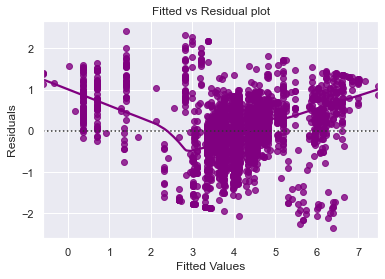

In [89]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

**Why the test?**

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

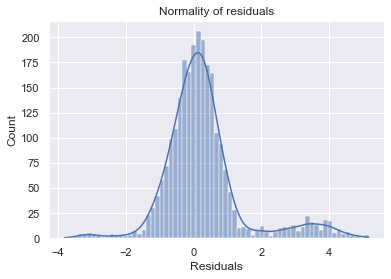

In [90]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does not have a bell shape.
- Let's check the Q-Q plot.

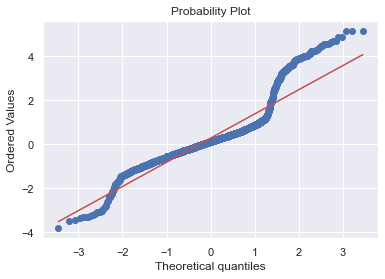

In [91]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals doesnt follow the line except the mid portion.
- Let's check the results of the Shapiro-Wilk test.

In [92]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.8584389686584473, pvalue=9.304621803116785e-43)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?** 

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [93]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train12)
lzip(name, test)

[('F statistic', 0.8862858936609649), ('p-value', 0.9822009832668823)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

**Now that we have checked all the assumptions of linear regression and they are satisfied, we can move towards the prediction part.**

In [94]:
# predictions on the test set
pred = olsmod1.predict(x_test12)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
2098,3.451,3.682
278,5.282,2.818
26,5.755,6.602
2910,4.511,4.112
2631,4.251,3.451
1582,4.506,4.083
2110,6.070,5.826
3160,4.195,3.639
2817,4.760,4.556
549,3.696,3.635


- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable.

- We can also visualize comparison result as a bar graph.

**Note**: As the number of records is large, for representation purpose, we are taking a sample of 25 records only.

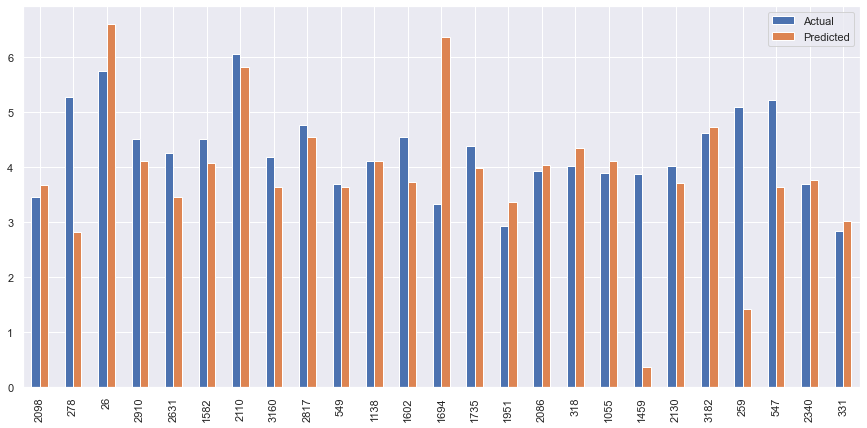

In [95]:
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

In [96]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod1_train_perf = model_performance_regression(olsmod1, x_train12, y_train)
olsmod1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.219,0.773,-1.337,-1.371,18.146


In [97]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod1_test_perf = model_performance_regression(olsmod1, x_test12, y_test)
olsmod1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.242,0.792,-1.502,-1.589,18.541


* The model is not able to effect variation in the data, which is not good.

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

* The MAPE on the test set suggests we can predict within 18.5% of the used_price. 

* Hence, we can conclude the model *olsmod1* is not good for prediction but good for inference purposes.

**Let's compare the initial model created with sklearn and the final statsmodels model.**

In [98]:
# training performance comparison

models_train_comp_df = pd.concat(
    [linearregression_train_perf.T, olsmod1_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,0.390,1.219
MAE,0.302,0.773
R-squared,0.761,-1.337
Adj. R-squared,0.756,-1.371
MAPE,7.185,18.146


In [99]:
# test performance comparison

models_test_comp_df = pd.concat(
    [linearregression_test_perf.T, olsmod1_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,0.386,1.242
MAE,0.299,0.792
R-squared,0.759,-1.502
Adj. R-squared,0.748,-1.589
MAPE,7.116,18.541


* The performance of the two models is close to each other.

**Let's recreate the final statsmodels model and print it's summary to gain insights.**

In [100]:
olsmodel_final = sm.OLS(y_train, x_train13).fit()
print(olsmodel_final.summary())

                                 OLS Regression Results                                
Dep. Variable:         used_price_log   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              832.5
Date:                Fri, 22 Oct 2021   Prob (F-statistic):                        0.00
Time:                        22:01:08   Log-Likelihood:                         -4040.9
No. Observations:                2499   AIC:                                      8154.
Df Residuals:                    2463   BIC:                                      8363.
Df Model:                          36                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

# CONCLUSION

* All the variables have positive coefficient except os_others.

* All P-values are zero except for os_windows.

* negative coefficience of os_others indicates that as it icreases the used_price also decreases.

* the positive coefficient of the rest of the variable indicates that as they increase, used_price also goes up.

* Brand names like(Apple, Blackberry and Google) have the highest impact on used_price.

* Brand_name_HTC and brand_name_samsung have almost the same coeeficient value.

* Brand name determines the used_price of a smartphone not the other specification(eg camera,weight,etc)

# RECOMMENDATION

* The data must include location where a particular brand thrives.

* Data must include the life span of the refurbished smartphone.

* Another model can be applied to check whether the outcome is the same.

* Data should be collated on the age customers.

* Their education and salary levels should be added to the data.